In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import gen_ML as Model
import tqdm as tqdm
import os 


In [11]:
print("here")
read = "G:/My Drive/Sys Lab/modified_data/new"

here


In [12]:
ls2 = os.listdir(read)   


In [13]:
df = pd.read_pickle(f"{read}/modified_all.pkl")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [1]:
def display_random(num = 4):
    random_rows = df.sample(n=num)
    x_values = random_rows['X'].apply(np.array)
    y_values = random_rows['y'].apply(np.array)
    print(x_values)
    print(y_values)
    fig, axes = plt.subplots(1, num, figsize=(24,16))
    for i, ax in enumerate(axes):
        x = x_values.iloc[i]
        print("x1", x[0][:10])
        print("x2", x[1][:10])
        y = y_values.iloc[i]
        print(x)
        # combined_array = np.column_stack((x, y))
        # angle = random.randint(1, 360)
        # theta = np.radians(angle)  # Convert the angle to radians
        # rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
        #                             [np.sin(theta), np.cos(theta)]])
        # rotated = np.dot(combined_array, rotation_matrix)
        rotated = random_rows[i]
        ax.scatter(x[0, :], x[1,:], marker='o')
        ax.set_title(f'Sample {i+1}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')


158822    [[-196.35689089876058], [-196.35689089876058],...
61209     [[-261.6915728738041], [-261.6915728738041], [...
113371    [[-274.7997420120921], [-274.7997420120921], [...
176303    [[-287.1390006117625], [-287.1390006117625], [...
Name: X, dtype: object
158822    -91.066628
61209     -64.969876
113371    114.876218
176303   -115.436711
Name: y, dtype: float64
x1 [-196.3568909]
x2 [-196.3568909]
[[-196.3568909 ]
 [-196.3568909 ]
 [-196.3568909 ]
 ...
 [-289.49896366]
 [-289.49896366]
 [-289.51641606]]


KeyError: 0

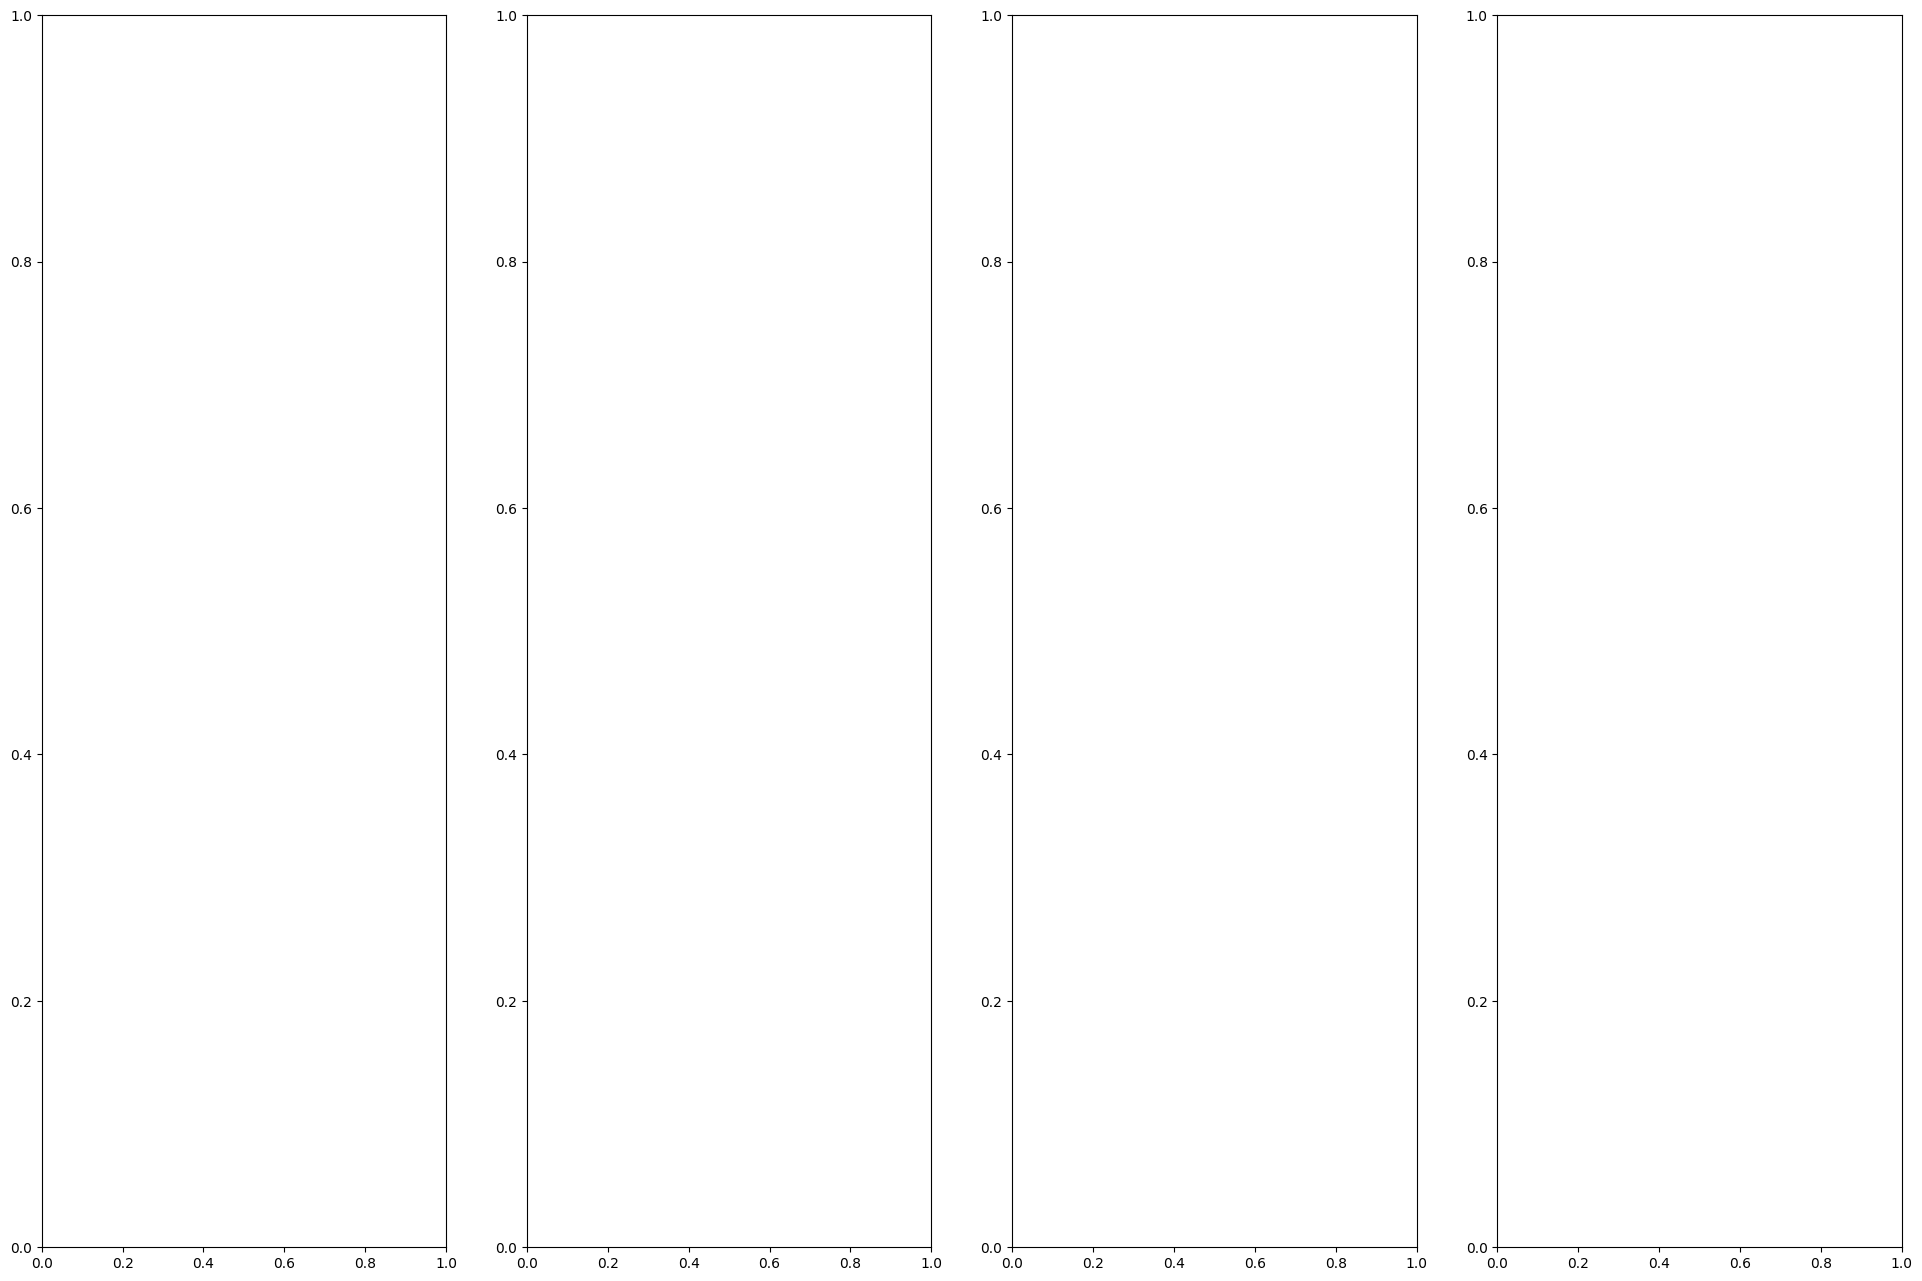

In [36]:
display_random()

In [47]:
# Need to initialize the weights and biases using the arc; I should code a dynamic way to make the arches 
# Also my numpy arrays vary in shape. I need to fix that 


model = Model.RNNModel([1, 6, 1])
print(model)

In [ ]:
model.generate()